## Digit Recognizer - Machine Learning Exploration

This notebook explores building a machine learning model for recognizing handwritten digits using the MNIST dataset. 

We'll utilize Python libraries like TensorFlow or PyTorch to train a neural network model and evaluate its performance on classifying the digits.

**Dependencies:**

* TensorFlow/PyTorch
* NumPy, Pandas (for data manipulation)

**Data Source:**

* MNIST Dataset: [https://www.kaggle.com/datasets/hojjatk/mnist-dataset](https://www.kaggle.com/datasets/hojjatk/mnist-dataset)

**References:**

* Deep Learning Book: [https://www.deeplearningbook.org/](https://www.deeplearningbook.org/)
arningbook.org/)


-------------------------

## Get The Packages

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import to_categorical


## Get The Data

In [2]:
data = pd.read_csv("DATA/train.csv")

## Some Info About My DATA

### What Lables

In [3]:
LABELS = data['label'].unique()

In [4]:
print(f'Lables Are : {LABELS}')

Lables Are : [1 0 4 7 3 5 8 9 2 6]


### How Much

In [5]:
COUNT=data['label'].value_counts()

In [6]:
DF = pd.DataFrame(COUNT)
print(DF)

       count
label       
1       4684
7       4401
3       4351
9       4188
2       4177
6       4137
0       4132
4       4072
8       4063
5       3795


### Now Let Us See Some Samples Of Our DATA

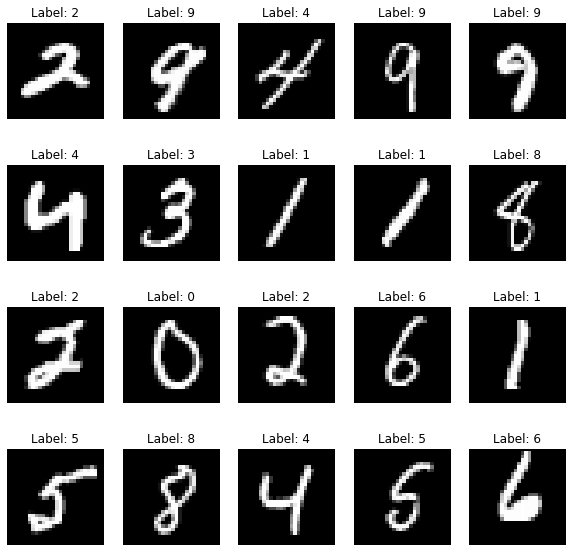

In [7]:
#Here We Chise Just % Images From Our Data
random_indices = np.random.randint(0, len(data), size=20)

#Then Visualize It 
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(10, 10))

for i, ax in zip(random_indices, axes.flatten()):
    
    image_data = data.iloc[i, 1:].values.reshape(28, 28)
    
    label = data.iloc[i, 0] 
    
    ax.imshow(image_data, cmap='gray') 
    ax.set_title(f'Label: {label}') # Here We Put The Lable Above Each Image
    ax.axis('off') 
plt.show()

## Splitting The Data

In [14]:
# Split features and labels
X = data.drop(columns=['label']).values.reshape(-1, 28, 28, 1)
y = to_categorical(data['label'])

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Creations The Models

In [15]:
# Define the CNN model
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.25),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
# Train the model
model.fit(X_train, y_train, batch_size=128, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
263/263 [==============================] - 21s 74ms/step - loss: 1.2363 - accuracy: 0.8430 - val_loss: 0.1325 - val_accuracy: 0.9624
Epoch 2/10
263/263 [==============================] - 19s 71ms/step - loss: 0.1451 - accuracy: 0.9566 - val_loss: 0.0907 - val_accuracy: 0.9735
Epoch 3/10
263/263 [==============================] - 20s 76ms/step - loss: 0.1025 - accuracy: 0.9701 - val_loss: 0.0811 - val_accuracy: 0.9752
Epoch 4/10
263/263 [==============================] - 31s 117ms/step - loss: 0.0729 - accuracy: 0.9772 - val_loss: 0.0751 - val_accuracy: 0.9792
Epoch 5/10
263/263 [==============================] - 22s 83ms/step - loss: 0.0604 - accuracy: 0.9819 - val_loss: 0.0677 - val_accuracy: 0.9796
Epoch 6/10
263/263 [==============================] - 26s 100ms/step - loss: 0.0560 - accuracy: 0.9826 - val_loss: 0.0651 - val_accuracy: 0.9831
Epoch 7/10
263/263 [==============================] - 23s 86ms/step - loss: 0.0473 - accuracy: 0.9857 - val_loss: 0.0624 - val_accurac

In [17]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy}')

263/263 [==============================] - 2s 7ms/step - loss: 0.0554 - accuracy: 0.9855
Test accuracy: 0.9854761958122253


In [20]:
model.save('Atwan98%.h5')